# Self-Driving Car Engineer Nanodegree

## Deep Learning

## Project: Build a Traffic Sign Recognition Classifier

In this notebook, a template is provided for you to implement your functionality in stages, which is required to successfully complete this project. If additional code is required that cannot be included in the notebook, be sure that the Python code is successfully imported and included in your submission if necessary. 

> **Note**: Once you have completed all of the code implementations, you need to finalize your work by exporting the iPython Notebook as an HTML document. Before exporting the notebook to html, all of the code cells need to have been run so that reviewers can see the final implementation and output. You can then export the notebook by using the menu above and navigating to  \n",
    "**File -> Download as -> HTML (.html)**. Include the finished document along with this notebook as your submission. 

In addition to implementing code, there is a writeup to complete. The writeup should be completed in a separate file, which can be either a markdown file or a pdf document. There is a [write up template](https://github.com/udacity/CarND-Traffic-Sign-Classifier-Project/blob/master/writeup_template.md) that can be used to guide the writing process. Completing the code template and writeup template will cover all of the [rubric points](https://review.udacity.com/#!/rubrics/481/view) for this project.

The [rubric](https://review.udacity.com/#!/rubrics/481/view) contains "Stand Out Suggestions" for enhancing the project beyond the minimum requirements. The stand out suggestions are optional. If you decide to pursue the "stand out suggestions", you can include the code in this Ipython notebook and also discuss the results in the writeup file.


>**Note:** Code and Markdown cells can be executed using the **Shift + Enter** keyboard shortcut. In addition, Markdown cells can be edited by typically double-clicking the cell to enter edit mode.

---
## Step 0: Load The Data

In [1]:
import requests
import os

def download_file_from_google_drive(id, destination):
    URL = "https://docs.google.com/uc?export=download"

    session = requests.Session()

    response = session.get(URL, params = { 'id' : id }, stream = True)
    token = get_confirm_token(response)

    if token:
        params = { 'id' : id, 'confirm' : token }
        response = session.get(URL, params = params, stream = True)

    save_response_content(response, destination)    

def get_confirm_token(response):
    for key, value in response.cookies.items():
        if key.startswith('download_warning'):
            return value
    return None

def save_response_content(response, destination):
    CHUNK_SIZE = 32768
    with open(destination, "wb") as fp:
        for chunk in response.iter_content(CHUNK_SIZE):
            if chunk: # filter out keep-alive new chunks
                fp.write(chunk)


rootdir = './data'
ids = {'train': '0B0cip0pNcGG4RGFrS2k0VE5iWGc',
       'test':'0B0cip0pNcGG4OGdkMmNIeUhQVVk', 
       'validation':'0B0cip0pNcGG4Y09oUDJPdmVlQjQ'}
for name, file_id in ids.items():
    download_file_from_google_drive(file_id, os.path.join(rootdir, name+'.pkl'))

In [2]:
# Load pickled data
import pickle

# TODO: Fill this in based on where you saved the training and testing data

training_file = 'data/train.pkl'
validation_file= 'data/validation.pkl'
testing_file = 'data/test.pkl'

with open(training_file, mode='rb') as f:
    train = pickle.load(f)
with open(validation_file, mode='rb') as f:
    valid = pickle.load(f)
with open(testing_file, mode='rb') as f:
    test = pickle.load(f)
    
X_train, y_train = train['features'], train['labels']
X_validation, y_validation = valid['features'], valid['labels']
X_test, y_test = test['features'], test['labels']
print('train:{}, validation:{}, test:{}'.format(len(y_train), len(y_validation), len(y_test)))

train:31367, validation:3921, test:3921


---

## Step 1: Dataset Summary & Exploration

The pickled data is a dictionary with 4 key/value pairs:

- `'features'` is a 4D array containing raw pixel data of the traffic sign images, (num examples, width, height, channels).
- `'labels'` is a 1D array containing the label/class id of the traffic sign. The file `signnames.csv` contains id -> name mappings for each id.
- `'sizes'` is a list containing tuples, (width, height) representing the original width and height the image.
- `'coords'` is a list containing tuples, (x1, y1, x2, y2) representing coordinates of a bounding box around the sign in the image. **THESE COORDINATES ASSUME THE ORIGINAL IMAGE. THE PICKLED DATA CONTAINS RESIZED VERSIONS (32 by 32) OF THESE IMAGES**

Complete the basic data summary below. Use python, numpy and/or pandas methods to calculate the data summary rather than hard coding the results. For example, the [pandas shape method](http://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.shape.html) might be useful for calculating some of the summary results. 

### Provide a Basic Summary of the Data Set Using Python, Numpy and/or Pandas

In [54]:
### Replace each question mark with the appropriate value. 
### Use python, pandas or numpy methods rather than hard coding the results
import numpy as np

# TODO: Number of training examples
n_train = X_train.shape[0]

# TODO: Number of validation examples
n_validation = X_validation.shape[0]

# TODO: Number of testing examples.
n_test = X_test.shape[0]

# TODO: What's the shape of an traffic sign image?
image_shape = X_train.shape[1:4]

# TODO: How many unique classes/labels there are in the dataset.
n_classes = np.unique(y_train).shape[0]

print("Number of training examples =", n_train)
print("Number of testing examples =", n_test)
print("Image data shape =", image_shape)
print("Number of classes =", n_classes)

Number of training examples = 31367
Number of testing examples = 3921
Image data shape = (36, 36, 3)
Number of classes = 43


### Include an exploratory visualization of the dataset

Visualize the German Traffic Signs Dataset using the pickled file(s). This is open ended, suggestions include: plotting traffic sign images, plotting the count of each sign, etc. 

The [Matplotlib](http://matplotlib.org/) [examples](http://matplotlib.org/examples/index.html) and [gallery](http://matplotlib.org/gallery.html) pages are a great resource for doing visualizations in Python.

**NOTE:** It's recommended you start with something simple first. If you wish to do more, come back to it after you've completed the rest of the sections. It can be interesting to look at the distribution of classes in the training, validation and test set. Is the distribution the same? Are there more examples of some classes than others?

In [4]:
### Data exploration visualization code goes here.
### Feel free to use as many code cells as needed.
import matplotlib.pyplot as plt
# Visualizations will be shown in the notebook.
%matplotlib inline

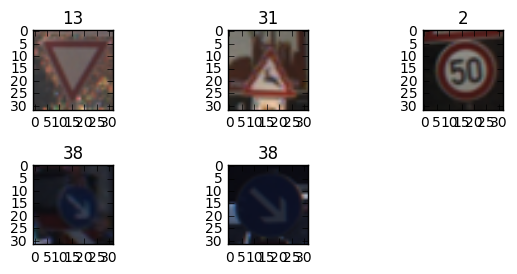

In [5]:
import random

for i in range(5):
    index = random.randint(0, len(X_train))
    image = X_train[index].squeeze()
    plt.subplot(3, 3, i+1)
    plt.imshow(image)
    plt.title(y_train[index])
plt.tight_layout()
plt.show()

----

## Step 2: Design and Test a Model Architecture

Design and implement a deep learning model that learns to recognize traffic signs. Train and test your model on the [German Traffic Sign Dataset](http://benchmark.ini.rub.de/?section=gtsrb&subsection=dataset).

The LeNet-5 implementation shown in the [classroom](https://classroom.udacity.com/nanodegrees/nd013/parts/fbf77062-5703-404e-b60c-95b78b2f3f9e/modules/6df7ae49-c61c-4bb2-a23e-6527e69209ec/lessons/601ae704-1035-4287-8b11-e2c2716217ad/concepts/d4aca031-508f-4e0b-b493-e7b706120f81) at the end of the CNN lesson is a solid starting point. You'll have to change the number of classes and possibly the preprocessing, but aside from that it's plug and play! 

With the LeNet-5 solution from the lecture, you should expect a validation set accuracy of about 0.89. To meet specifications, the validation set accuracy will need to be at least 0.93. It is possible to get an even higher accuracy, but 0.93 is the minimum for a successful project submission. 

There are various aspects to consider when thinking about this problem:

- Neural network architecture (is the network over or underfitting?)
- Play around preprocessing techniques (normalization, rgb to grayscale, etc)
- Number of examples per label (some have more than others).
- Generate fake data.

Here is an example of a [published baseline model on this problem](http://yann.lecun.com/exdb/publis/pdf/sermanet-ijcnn-11.pdf). It's not required to be familiar with the approach used in the paper but, it's good practice to try to read papers like these.

### Pre-process the Data Set (normalization, grayscale, etc.)

Minimally, the image data should be normalized so that the data has mean zero and equal variance. For image data, `(pixel - 128)/ 128` is a quick way to approximately normalize the data and can be used in this project. 

Other pre-processing steps are optional. You can try different techniques to see if it improves performance. 

Use the code cell (or multiple code cells, if necessary) to implement the first step of your project.

In [6]:
### Preprocess the data here. It is required to normalize the data. Other preprocessing steps could include 
### converting to grayscale, etc.
### Feel free to use as many code cells as needed.
NUM_CLASSES=43
IMG_SIZE = 32
GRAYSCALE = False
NUM_CHANNELS = 1 if GRAYSCALE else 3
PAD = 2


def rgb_to_gray(images):
    images_gray = np.average(images, axis=3)
    print(images_gray.shape)
    # shape: (batch_size, 32, 32)
    images_gray = np.expand_dims(images_gray, axis=3)
    print(images_gray.shape)
    # shape: (batch_size, 32, 32, 1)
    return images_gray


def normalize_pixels(X):
    # convert uint8 images: [0, 255] -> [-1, 1]
    X = X.astype('float32')
    X = (X - 128.) / 128.
    return X

def preprocess_images(X, grayscale=False, pad=-1):
    if grayscale:
        X = rgb_to_gray(X)
    X = normalize_pixels(X)
    if pad > 0:
        X = np.pad(X, ((0,0),(pad,pad),(pad,pad),(0,0)), 'constant')
    return X

X_train=preprocess_images(X_train, GRAYSCALE, PAD)
X_validation=preprocess_images(X_validation, GRAYSCALE, PAD)
X_test=preprocess_images(X_test, GRAYSCALE, PAD)

from sklearn.utils import shuffle
X_train, y_train = shuffle(X_train, y_train)

### Description of my preprocessing
I don't use gray scale conversion because I got better results without this.
Zero padding is added because I use valid padding in my CNN layers.

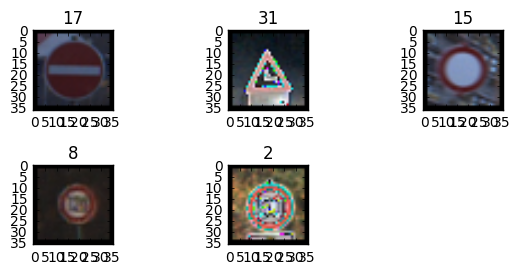

In [7]:
for i in range(5):
    index = random.randint(0, len(X_train))
    image = X_train[index].squeeze()
    plt.subplot(3, 3, i+1)
    plt.imshow(image)
    plt.title(y_train[index])
plt.tight_layout()
plt.show()

In [8]:
# Class Distribution across Dataset
#lbls, cnts = np.unique(y_train, return_counts=True)
#import seaborn as sns
#sns.countplot(x=lbls, y=cnts, kde=False, rug=True);
#lbls, cnts = np.unique(y_valid, return_counts=True)
#sns.countplot(x=lbls, y=cnts, kde=False, rug=True);
#lbls, cnts = np.unique(y_test, return_counts=True)
#sns.countplot(x=lbls, y=cnts, kde=False, rug=True);

### Model Architecture

In [9]:
### Define your architecture here.
### Feel free to use as many code cells as needed.
import tensorflow as tf
from tensorflow.contrib.layers import flatten


def LeNet(x, keep_prob):    

    # Layer 1: Convolutional. Input = 36x36x3. Output = 32x32x16.
    x1 = tf.contrib.layers.conv2d(x, 16, 5, stride=1, padding='VALID', 
                          weights_initializer=tf.contrib.layers.xavier_initializer())
    x1 = tf.contrib.layers.batch_norm(x1, is_training=True)
    x1 = tf.nn.relu(x1)
    x1 = tf.nn.dropout(x1, keep_prob=keep_prob)

    # Pooling. Output = 32x32x16.
    x1 = tf.contrib.layers.avg_pool2d(x1, 2, stride=1, padding='VALID')

    # Layer 2: Convolutional. Output = 30x30x32.
    x2 = tf.contrib.layers.conv2d(x1, 32, 5, stride=1, padding='VALID', 
                          weights_initializer=tf.contrib.layers.xavier_initializer())
    x2 = tf.contrib.layers.batch_norm(x2, is_training=True)
    x2 = tf.nn.relu(x2)
    x2 = tf.nn.dropout(x2, keep_prob=keep_prob)
    # Pooling. Output = 15x15x32.
    x2 = tf.contrib.layers.avg_pool2d(x2, 2, stride=2, padding='VALID')

    # Flatten. Output = 512.
    flat =  tf.contrib.layers.flatten(x2)
    # Layer 3: Fully Connected. Output = 256.
    logits1 = tf.contrib.layers.fully_connected(flat, 256,
                              weights_initializer=tf.contrib.layers.xavier_initializer())
    logits1 = tf.contrib.layers.batch_norm(logits1, is_training=True)
    out1 = tf.nn.relu(logits1)
    out1 = tf.nn.dropout(out1, keep_prob=keep_prob)

    # Layer 4: Fully Connected. Output = 128.
    logits2 = tf.contrib.layers.fully_connected(logits1, 128,
                              weights_initializer=tf.contrib.layers.xavier_initializer())
    logits2 = tf.contrib.layers.batch_norm(logits2, is_training=True)
    out2 = tf.nn.relu(logits2)
    out2 = tf.nn.dropout(out2, keep_prob=keep_prob)

    # Layer 5: Fully Connected. Output = 43.
    logits = tf.contrib.layers.fully_connected(logits2, NUM_CLASSES,
                             weights_initializer=tf.contrib.layers.xavier_initializer())
    return logits, x1, x2

### Description of my model architecture
My model consists of two convolution layers and average poolings, and two fully connected layers.
I use ReLU activation function, Xavier parameter initialization and batch normalization and dropout techniques.
Especially batch normalization offers my model great performance.

### Train, Validate and Test the Model

A validation set can be used to assess how well the model is performing. A low accuracy on the training and validation
sets imply underfitting. A high accuracy on the training set but low accuracy on the validation set implies overfitting.

In [10]:
LR = 0.001
EPOCHS =10
BATCH_SIZE = 64
BATCH_SIZE_INF = 64
KEEP_PROB = 0.5

### Description of my hyper parameters selection
Learning rate and batch size were chosen from a few experiments. Keep probability was fixed to 0.5. For the number of epochs 10, accuracy on the validation set seems high enough (0.995).

In [11]:
### Train your model here.
### Calculate and report the accuracy on the training and validation set.
### Once a final model architecture is selected, 
### the accuracy on the test set should be calculated and reported as well.
### Feel free to use as many code cells as needed.
def train_nn():
    with tf.variable_scope('train'):
        x = tf.placeholder(tf.float32, (None, IMG_SIZE+2*PAD, IMG_SIZE+2*PAD, NUM_CHANNELS))
        y = tf.placeholder(tf.int32, (None))
        keep_prob = tf.placeholder(tf.float32)
        learning_rate = tf.placeholder(tf.float32)
        one_hot_y = tf.one_hot(y, NUM_CLASSES)
        # model calc
        logits, x1, x2 = LeNet(x, keep_prob)
        # for training
        loss = tf.reduce_mean(tf.nn.softmax_cross_entropy_with_logits(labels=one_hot_y, logits=logits))
        optimizer = tf.train.AdamOptimizer(learning_rate=learning_rate)
        training_op = optimizer.minimize(loss)
        
        inference = tf.argmax(logits, axis=1)
        accuracy_op = tf.reduce_mean(tf.cast(tf.equal(inference, tf.argmax(one_hot_y, axis=1)), tf.float32))

    # Return relevant tensor references
    return x, y, keep_prob, learning_rate, logits, loss, inference, accuracy_op, training_op, x1, x2

def evaluate(accuracy_operation, X_data, y_data):
    num_examples = X_data.shape[0]
    print(num_examples)
    total_accuracy = 0
    sess = tf.get_default_session()
    for offset in range(0, num_examples, BATCH_SIZE_INF):
        batch_x, batch_y = X_data[offset:offset+BATCH_SIZE_INF], y_data[offset:offset+BATCH_SIZE_INF]
        accuracy = sess.run(accuracy_operation, feed_dict={x: batch_x, y: batch_y, keep_prob:1.0})
        total_accuracy += (accuracy * batch_x.shape[0])
    print(total_accuracy)
    return total_accuracy / num_examples

In [12]:
with tf.Graph().as_default(), tf.Session() as sess:
    x, y, keep_prob, learning_rate, logits, loss, infer, accuracy_op, training_op, x1, x2 = train_nn()
    saver = tf.train.Saver()

    sess.run(tf.global_variables_initializer())
    num_examples = X_train.shape[0]
    
    print("Training...")
    print()
    for i in range(EPOCHS):
        X_train, y_train = shuffle(X_train, y_train)
        loss_batch = 0.
        for offset in range(0, num_examples, BATCH_SIZE):
            end = offset + BATCH_SIZE
            batch_x, batch_y = X_train[offset:end], y_train[offset:end]
            loss_v, _ = sess.run([loss, training_op], feed_dict={x: batch_x, y: batch_y, keep_prob: KEEP_PROB, learning_rate: LR})
            loss_batch += loss_v
        print("EPOCH {} ...".format(i+1))
        train_accuracy = evaluate(accuracy_op, X_train, y_train)
        print("Train Loss = {:.5f}".format(loss_batch / BATCH_SIZE))
        print("Train Accuracy = {:.5f}".format(train_accuracy))
        validation_accuracy = evaluate(accuracy_op, X_validation, y_validation)
        print("Validation Accuracy = {:.3f}".format(validation_accuracy))
        print()
        
    saver.save(sess, './models/lenet')
    print("Model saved")

Training...

EPOCH 1 ...
31367
30926.0
Train Loss = 5.97129
Train Accuracy = 0.98594
3921
3841.0
Validation Accuracy = 0.980

EPOCH 2 ...
31367
31135.0
Train Loss = 0.95595
Train Accuracy = 0.99260
3921
3856.0
Validation Accuracy = 0.983

EPOCH 3 ...
31367
31258.0
Train Loss = 0.59600
Train Accuracy = 0.99653
3921
3875.0
Validation Accuracy = 0.988

EPOCH 4 ...
31367
31190.0
Train Loss = 0.41657
Train Accuracy = 0.99436
3921
3864.0
Validation Accuracy = 0.985

EPOCH 5 ...
31367
31301.0
Train Loss = 0.34211
Train Accuracy = 0.99790
3921
3882.0
Validation Accuracy = 0.990

EPOCH 6 ...
31367
31272.0
Train Loss = 0.29674
Train Accuracy = 0.99697
3921
3880.0
Validation Accuracy = 0.990

EPOCH 7 ...
31367
31317.0
Train Loss = 0.31705
Train Accuracy = 0.99841
3921
3884.0
Validation Accuracy = 0.991

EPOCH 8 ...
31367
31347.0
Train Loss = 0.21219
Train Accuracy = 0.99936
3921
3896.0
Validation Accuracy = 0.994

EPOCH 9 ...
31367
31321.0
Train Loss = 0.26006
Train Accuracy = 0.99853
3921
3886.0

In [13]:
with tf.Graph().as_default(), tf.Session() as sess:
    x, y, keep_prob, learning_rate, logits, loss, infer, accuracy_op, training_op, x1, x2 = train_nn()
    saver = tf.train.Saver()
    sess.run(tf.global_variables_initializer())
    saver.restore(sess, './models/lenet')
    num_examples = X_test.shape[0]
    for offset in range(0, num_examples, BATCH_SIZE):
        end = offset + BATCH_SIZE
        batch_x, batch_y = X_test[offset:end], y_test[offset:end]
        logits_v, infer_v = sess.run([logits, infer], feed_dict={x: batch_x, keep_prob:1.0})
    test_accuracy = evaluate(accuracy_op, X_test, y_test)
    print("Test Accuracy = {:.3f}".format(test_accuracy))

3921
3891.0
Test Accuracy = 0.992


---

## Step 3: Test a Model on New Images

To give yourself more insight into how your model is working, download at least five pictures of German traffic signs from the web and use your model to predict the traffic sign type.

You may find `signnames.csv` useful as it contains mappings from the class id (integer) to the actual sign name.

### Load and Output the Images

samples/27.jpg (358, 358)
samples/3.jpg (353, 352)
samples/14.jpg (340, 340)
samples/30.jpg (356, 356)
samples/11.jpg (750, 750)


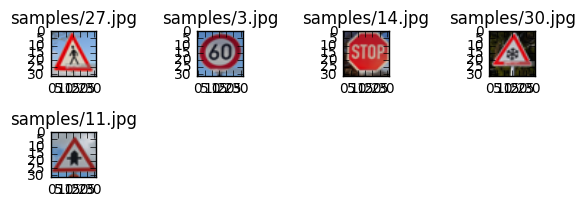

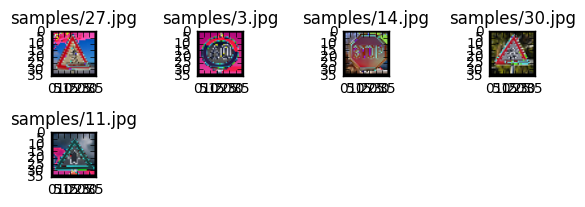

In [14]:
### Load the images and plot them here.
### Feel free to use as many code cells as needed.
import os
import numpy as np
from PIL import Image


def read_images_from_paths(image_paths):
    # Read image files, resize them, convert to numpy arrays w/ dtype=uint8
    images = []
    for image_path in image_paths:
        image = Image.open(image_path)
        image = image.convert('RGB')
        print(image_path, image.size)
        image = image.resize((IMG_SIZE, IMG_SIZE), Image.BICUBIC)
        image = np.array(list(image.getdata()), dtype='uint8')
        image = np.reshape(image, (IMG_SIZE, IMG_SIZE, 3))
        images.append(image)
    images = np.array(images, dtype='uint8')
    return images


image_paths  = [os.path.join('samples', image_file) for image_file in os.listdir('samples')]
images = read_images_from_paths(image_paths)

for i, image in enumerate(images):
    plt.subplot(4, 4, i+1)
    plt.imshow(image)
    plt.title(image_paths[i])
plt.tight_layout()
plt.show()
#print(images[0])
#print(normalize_pixels(images[0]))
images = preprocess_images(images, GRAYSCALE, PAD)
for i, image in enumerate(images):
    plt.subplot(4, 4, i+1)
    plt.imshow(image)
    plt.title(image_paths[i])

plt.tight_layout()
plt.show()

### Description of my test images
I collect original five images from the web and cropped them to square. This is because for the original skew images due to preprocessing, my learned model performed poorly(20% ACC). 30.jpg('Beware of ice/snow') was still unrecognized. Based on the following observation of CNN feature maps, I guess it is because the resolution is too small to grasp the detail of the sign.

### Predict the Sign Type for Each Image

In [15]:
### Run the predictions here and use the model to output the prediction for each image.
### Make sure to pre-process the images with the same pre-processing pipeline used earlier.
### Feel free to use as many code cells as needed.
import csv

def load_signnames(root_path='.'):
    # Load signnames.csv to map label number to sign string
    label2signname = {}
    with open(os.path.join(root_path, 'signnames.csv'), 'r') as fp:
        signnames_csv = csv.reader(fp, delimiter=',')
        header = next(signnames_csv)
        for label, signname in signnames_csv:
            label2signname[int(label)] = signname
    return label2signname

label2signname = load_signnames()

# Prediction
with tf.Graph().as_default(), tf.Session() as sess:
    x, _, keep_prob, _, logits, _, prediction, _, _, x1, x2 = train_nn()
    saver = tf.train.Saver()
    sess.run(tf.global_variables_initializer())
    saver.restore(sess, './models/lenet')
    
    # Run inference on CNN to make predictions, and remember the logits for later
    logits_v, prediction_v = sess.run([logits, prediction], feed_dict={x: images, keep_prob:1.0})
    logits_u, prediction_u = sess.run([logits, prediction], feed_dict={x: X_test, keep_prob:1.0})

### Analyze Performance

In [16]:
### Calculate the accuracy for these 5 new images. 
### For example, if the model predicted 1 out of 5 signs correctly, it's 20% accurate on these new images.

# Show Predictions
predicted_names = [label2signname[lbl] for lbl in prediction_v]
cnt = 0
for f, p in zip(image_paths, predicted_names):
    true_name = label2signname[int(os.path.splitext(os.path.basename(f))[0])]
    print('filename:{}({}) prediction:{}'.format(os.path.basename(f), true_name, p))
    cnt += 1 if true_name == p else 0
print('ACC: {} %'.format(cnt / len(prediction_v)))

filename:27.jpg(Pedestrians) prediction:Pedestrians
filename:3.jpg(Speed limit (60km/h)) prediction:Speed limit (60km/h)
filename:14.jpg(Stop) prediction:Stop
filename:30.jpg(Beware of ice/snow) prediction:Speed limit (100km/h)
filename:11.jpg(Right-of-way at the next intersection) prediction:Right-of-way at the next intersection
ACC: 0.8 %


### Output Top 5 Softmax Probabilities For Each Image Found on the Web

For each of the new images, print out the model's softmax probabilities to show the **certainty** of the model's predictions (limit the output to the top 5 probabilities for each image). [`tf.nn.top_k`](https://www.tensorflow.org/versions/r0.12/api_docs/python/nn.html#top_k) could prove helpful here. 

The example below demonstrates how tf.nn.top_k can be used to find the top k predictions for each image.

`tf.nn.top_k` will return the values and indices (class ids) of the top k predictions. So if k=3, for each sign, it'll return the 3 largest probabilities (out of a possible 43) and the correspoding class ids.

Take this numpy array as an example. The values in the array represent predictions. The array contains softmax probabilities for five candidate images with six possible classes. `tf.nn.top_k` is used to choose the three classes with the highest probability:

```
# (5, 6) array
a = np.array([[ 0.24879643,  0.07032244,  0.12641572,  0.34763842,  0.07893497,
         0.12789202],
       [ 0.28086119,  0.27569815,  0.08594638,  0.0178669 ,  0.18063401,
         0.15899337],
       [ 0.26076848,  0.23664738,  0.08020603,  0.07001922,  0.1134371 ,
         0.23892179],
       [ 0.11943333,  0.29198961,  0.02605103,  0.26234032,  0.1351348 ,
         0.16505091],
       [ 0.09561176,  0.34396535,  0.0643941 ,  0.16240774,  0.24206137,
         0.09155967]])
```

Running it through `sess.run(tf.nn.top_k(tf.constant(a), k=3))` produces:

```
TopKV2(values=array([[ 0.34763842,  0.24879643,  0.12789202],
       [ 0.28086119,  0.27569815,  0.18063401],
       [ 0.26076848,  0.23892179,  0.23664738],
       [ 0.29198961,  0.26234032,  0.16505091],
       [ 0.34396535,  0.24206137,  0.16240774]]), indices=array([[3, 0, 5],
       [0, 1, 4],
       [0, 5, 1],
       [1, 3, 5],
       [1, 4, 3]], dtype=int32))
```

Looking just at the first row we get `[ 0.34763842,  0.24879643,  0.12789202]`, you can confirm these are the 3 largest probabilities in `a`. You'll also notice `[3, 0, 5]` are the corresponding indices.

In [17]:
### Print out the top five softmax probabilities for the predictions on the German traffic sign images found on the web. 
### Feel free to use as many code cells as needed.
import seaborn as sns
import pandas as pd
idx_probs = []
with tf.Session() as sess:
    logits = tf.placeholder(tf.float32, [None, NUM_CLASSES])
    probs = tf.nn.softmax(logits)
    top_k_prob, top_k_idx = tf.nn.top_k(probs, k=5)
    top_k_probs, top_k_idxs = sess.run([top_k_prob, top_k_idx], feed_dict={logits: logits_v})
    print(top_k_probs)
    print(top_k_idxs)
    for prob, idx in zip(top_k_probs, top_k_idxs):
        idx_probs.append((prob, idx))        
for f in image_paths:
    print(os.path.basename(f))

[[  9.84199405e-01   7.33215548e-03   3.85978213e-03   3.71930446e-03
    2.16142056e-04]
 [  9.96371150e-01   2.03709025e-03   5.59038541e-04   3.25762259e-04
    3.01941560e-04]
 [  9.98813033e-01   5.98229584e-04   4.38909075e-04   6.30021532e-05
    2.15115615e-05]
 [  9.95895982e-01   2.08223541e-03   1.00283755e-03   2.59596971e-04
    1.73150809e-04]
 [  9.99972463e-01   9.11368988e-06   4.90770708e-06   2.37589097e-06
    2.03617060e-06]]
[[27 18 24  4 39]
 [ 3  9 38  2 15]
 [14 13 12 17  4]
 [ 7  8 40 42 10]
 [11 23 42 21 41]]
27.jpg
3.jpg
14.jpg
30.jpg
11.jpg


### Review of the performance on the new images
From these results, my model perform well on the cropped data although it seems ovefitting for each classes.

27.jpg


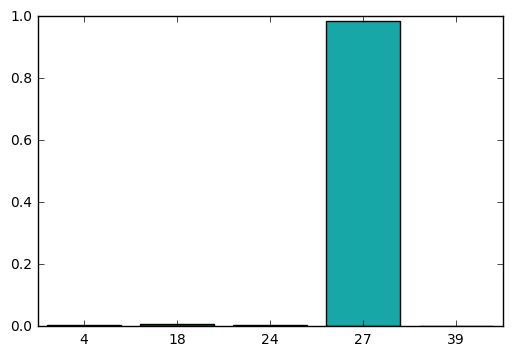

In [18]:
i=0
f=image_paths[i]
print(os.path.basename(f))
idxs, probs=idx_probs[i]
sns.barplot(probs, idxs);

3.jpg


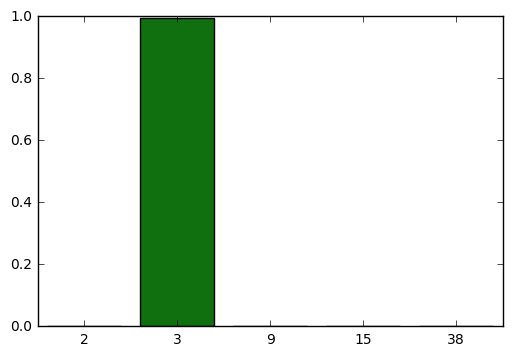

In [19]:
i=1
f=image_paths[i]
print(os.path.basename(f))
idxs, probs=idx_probs[i]
sns.barplot(probs, idxs);

14.jpg


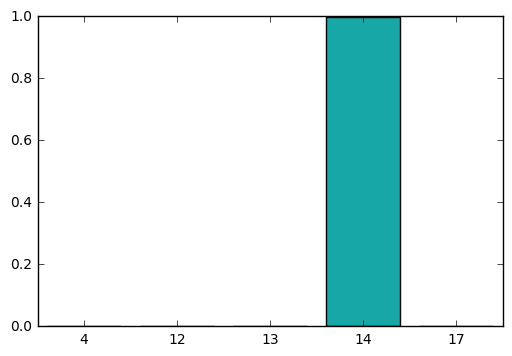

In [20]:
i=2
f=image_paths[i]
print(os.path.basename(f))
idxs, probs=idx_probs[i]
sns.barplot(probs, idxs);

30.jpg


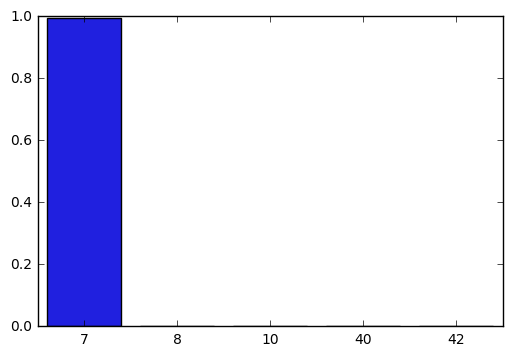

In [21]:
i=3
f=image_paths[i]
print(os.path.basename(f))
idxs, probs=idx_probs[i]
sns.barplot(probs, idxs);

11.jpg


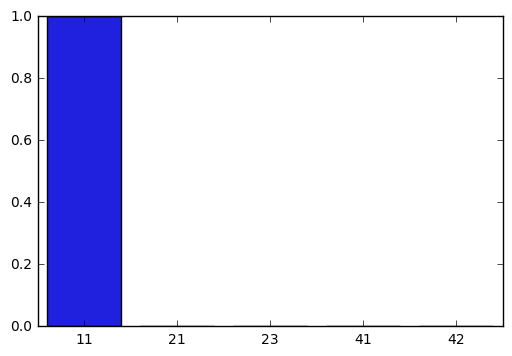

In [22]:
i=4
f=image_paths[i]
print(os.path.basename(f))
idxs, probs=idx_probs[i]
sns.barplot(probs, idxs);

### Project Writeup

Once you have completed the code implementation, document your results in a project writeup using this [template](https://github.com/udacity/CarND-Traffic-Sign-Classifier-Project/blob/master/writeup_template.md) as a guide. The writeup can be in a markdown or pdf file. 

> **Note**: Once you have completed all of the code implementations and successfully answered each question above, you may finalize your work by exporting the iPython Notebook as an HTML document. You can do this by using the menu above and navigating to  \n",
    "**File -> Download as -> HTML (.html)**. Include the finished document along with this notebook as your submission.

---

## Step 4 (Optional): Visualize the Neural Network's State with Test Images

 This Section is not required to complete but acts as an additional excersise for understaning the output of a neural network's weights. While neural networks can be a great learning device they are often referred to as a black box. We can understand what the weights of a neural network look like better by plotting their feature maps. After successfully training your neural network you can see what it's feature maps look like by plotting the output of the network's weight layers in response to a test stimuli image. From these plotted feature maps, it's possible to see what characteristics of an image the network finds interesting. For a sign, maybe the inner network feature maps react with high activation to the sign's boundary outline or to the contrast in the sign's painted symbol.

 Provided for you below is the function code that allows you to get the visualization output of any tensorflow weight layer you want. The inputs to the function should be a stimuli image, one used during training or a new one you provided, and then the tensorflow variable name that represents the layer's state during the training process, for instance if you wanted to see what the [LeNet lab's](https://classroom.udacity.com/nanodegrees/nd013/parts/fbf77062-5703-404e-b60c-95b78b2f3f9e/modules/6df7ae49-c61c-4bb2-a23e-6527e69209ec/lessons/601ae704-1035-4287-8b11-e2c2716217ad/concepts/d4aca031-508f-4e0b-b493-e7b706120f81) feature maps looked like for it's second convolutional layer you could enter conv2 as the tf_activation variable.

For an example of what feature map outputs look like, check out NVIDIA's results in their paper [End-to-End Deep Learning for Self-Driving Cars](https://devblogs.nvidia.com/parallelforall/deep-learning-self-driving-cars/) in the section Visualization of internal CNN State. NVIDIA was able to show that their network's inner weights had high activations to road boundary lines by comparing feature maps from an image with a clear path to one without. Try experimenting with a similar test to show that your trained network's weights are looking for interesting features, whether it's looking at differences in feature maps from images with or without a sign, or even what feature maps look like in a trained network vs a completely untrained one on the same sign image.

<figure>
 <img src="visualize_cnn.png" width="380" alt="Combined Image" />
 <figcaption>
 <p></p> 
 <p style="text-align: center;"> Your output should look something like this (above)</p> 
 </figcaption>
</figure>
 <p></p> 


In [41]:
### Visualize your network's feature maps here.
### Feel free to use as many code cells as needed.

# image_input: the test image being fed into the network to produce the feature maps
# tf_activation: should be a tf variable name used during your training procedure that represents the calculated state of a specific weight layer
# activation_min/max: can be used to view the activation contrast in more detail, by default matplot sets min and max to the actual min and max values of the output
# plt_num: used to plot out multiple different weight feature map sets on the same block, just extend the plt number for each new feature map entry

def outputFeatureMap(image_input, tf_activation, session, x, keep_prob, is_processed=True, activation_min=-1, activation_max=-1 ,plt_num=1):
    # Here make sure to preprocess your image_input in a way your network expects
    # with size, normalization, ect if needed
    if not is_processed:
        image_input = preprocess_images(image_input, GRAYSCALE)
    # Note: x should be the same name as your network's tensorflow data placeholder variable
    # If you get an error tf_activation is not defined it may be having trouble accessing the variable from inside a function
    activation = tf_activation.eval(session=session,feed_dict={x : image_input, keep_prob: 1.0})
    featuremaps = activation.shape[3]
    plt.figure(plt_num, figsize=(15,15))
    for featuremap in range(featuremaps):
        plt.subplot(6,8, featuremap+1) # sets the number of feature maps to show on each row and column
        plt.title('FeatureMap ' + str(featuremap)) # displays the feature map number
        if activation_min != -1 & activation_max != -1:
            plt.imshow(activation[0,:,:, featuremap], interpolation="nearest", vmin =activation_min, vmax=activation_max, cmap="gray")
        elif activation_max != -1:
            plt.imshow(activation[0,:,:, featuremap], interpolation="nearest", vmax=activation_max, cmap="gray")
        elif activation_min !=-1:
            plt.imshow(activation[0,:,:, featuremap], interpolation="nearest", vmin=activation_min, cmap="gray")
        else:
            plt.imshow(activation[0,:,:, featuremap], interpolation="nearest", cmap="gray")

def evaluate_feature(images, idx, layer=1):
    with tf.Graph().as_default(), tf.Session() as sess:
        x, _, keep_prob, _, logits, _, prediction, _, _, x1, x2 = train_nn()
        saver = tf.train.Saver()
        sess.run(tf.global_variables_initializer())
        saver.restore(sess, './models/lenet')
        activation_fn = x1 if layer == 1 else x2
        outputFeatureMap([images[idx]], activation_fn, sess, x, keep_prob)            

### Discussion on feature maps
From the following feature maps of two convolution layers, we could interprete the first layer feature maps, but couldn't the second layer ones. For '30.jpg(Beware of ice/snow)', it's difficult to interprete even the first feature map.

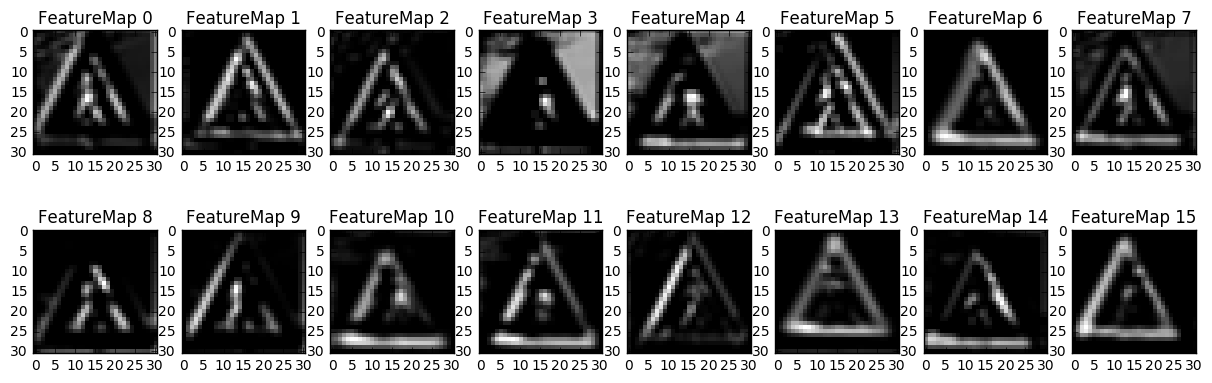

In [42]:
evaluate_feature(images, 0, 1)

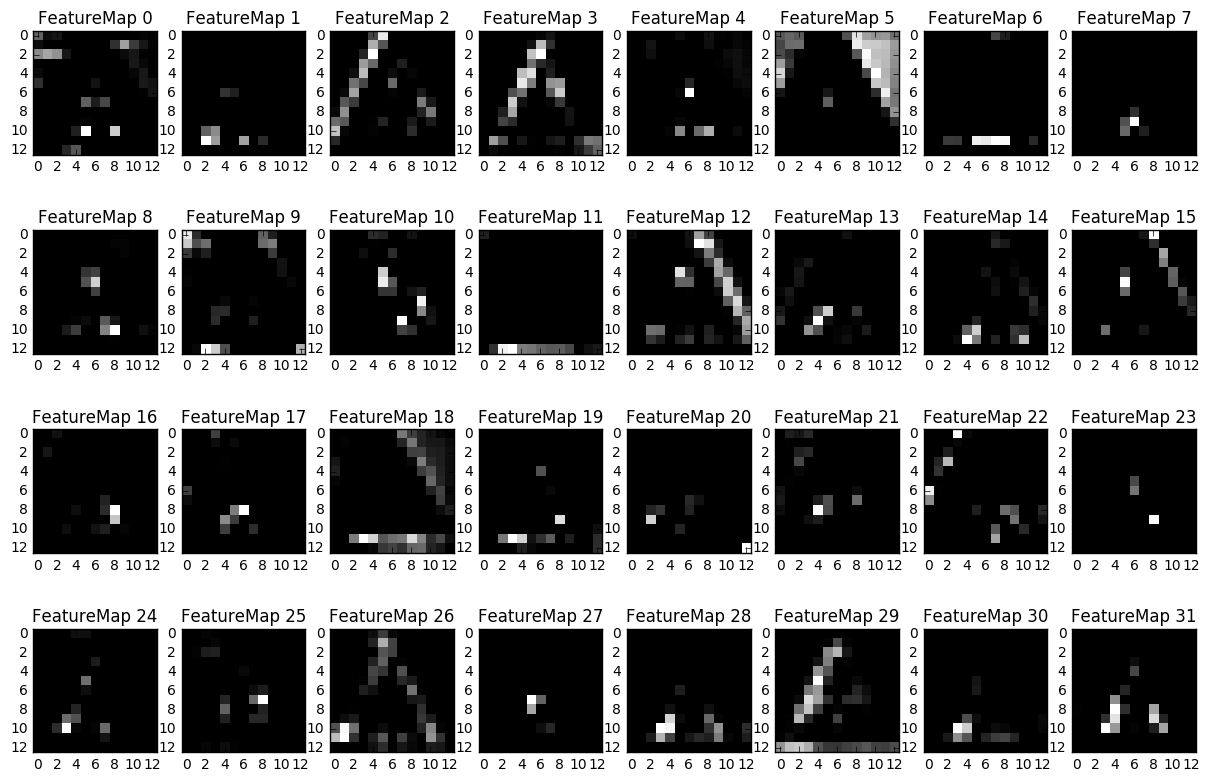

In [43]:
evaluate_feature(images, 0, 2)

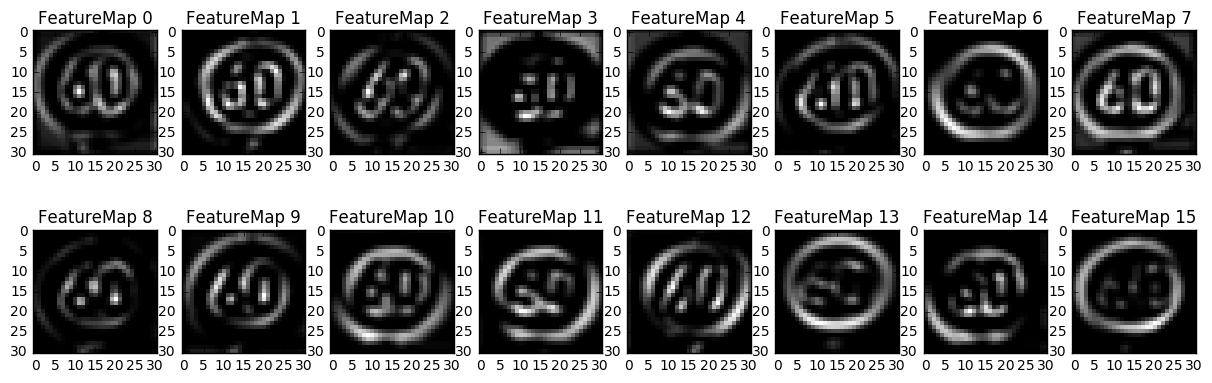

In [46]:
evaluate_feature(images, 1, 1)

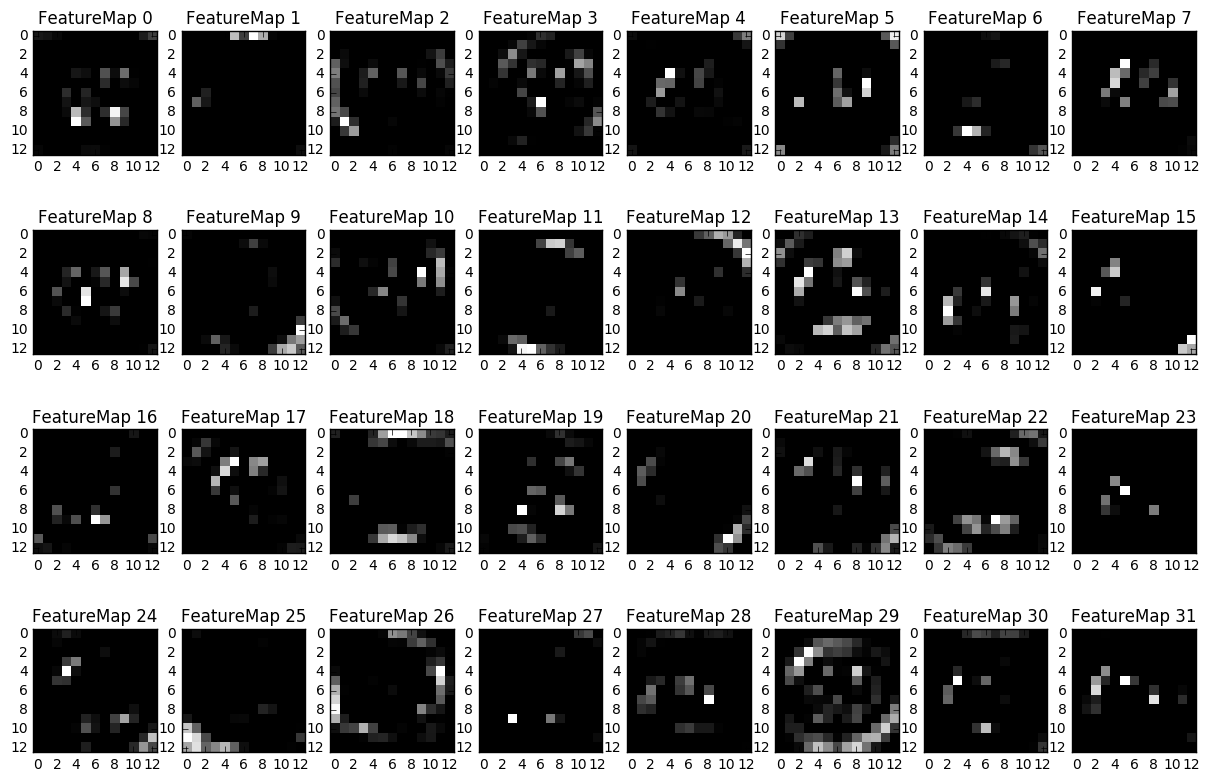

In [47]:
evaluate_feature(images, 1, 2)

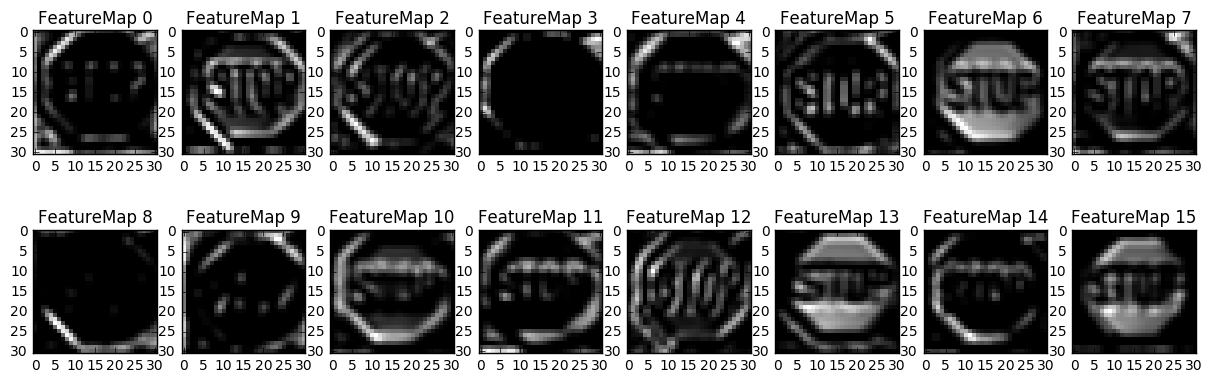

In [48]:
evaluate_feature(images, 2, 1)

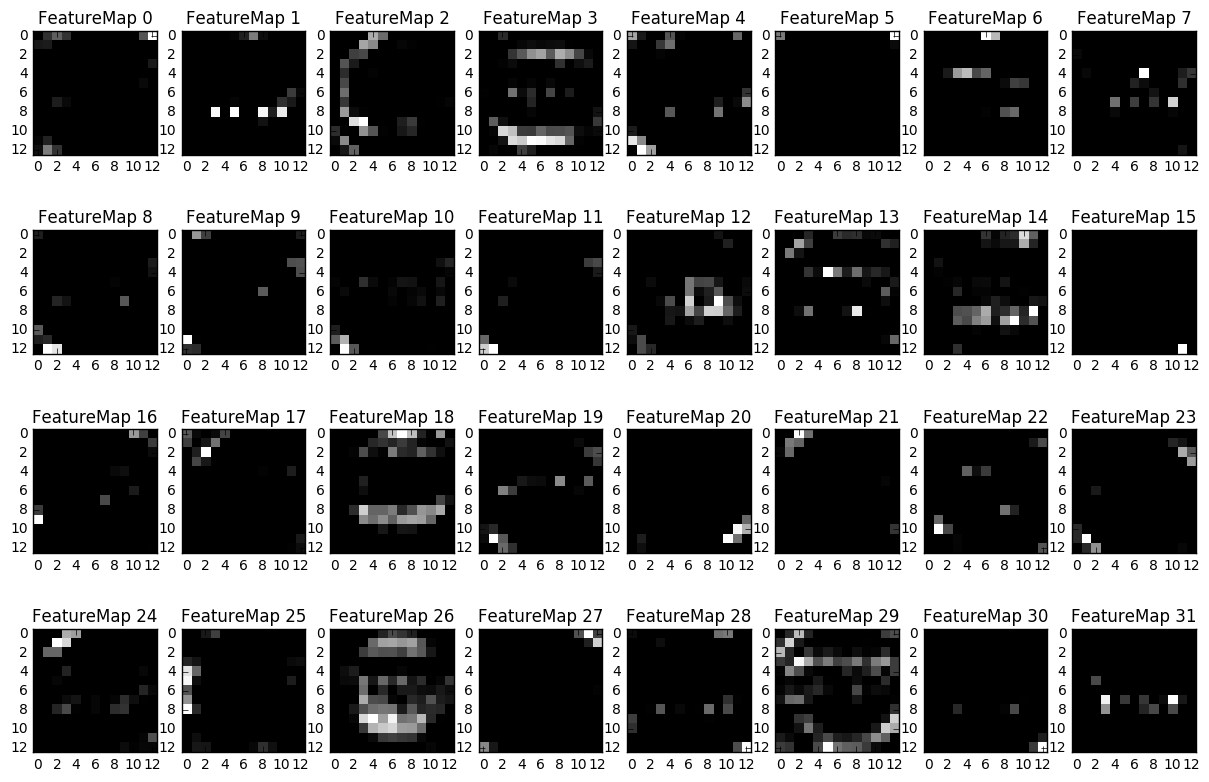

In [49]:
evaluate_feature(images, 2, 2)

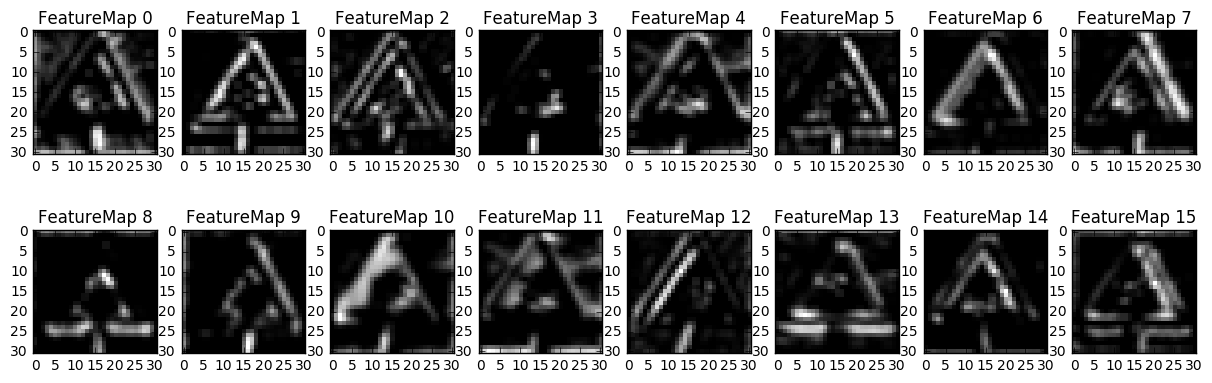

In [50]:
evaluate_feature(images, 3, 1)

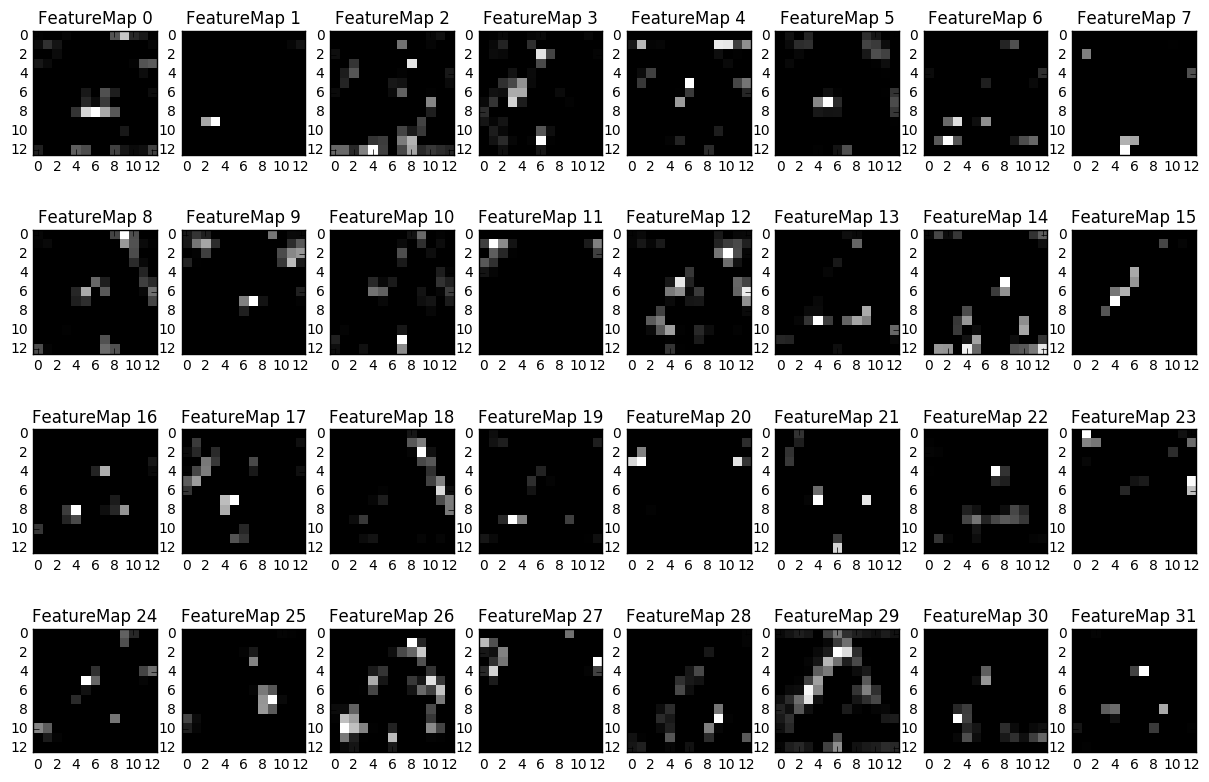

In [51]:
evaluate_feature(images, 3, 2)

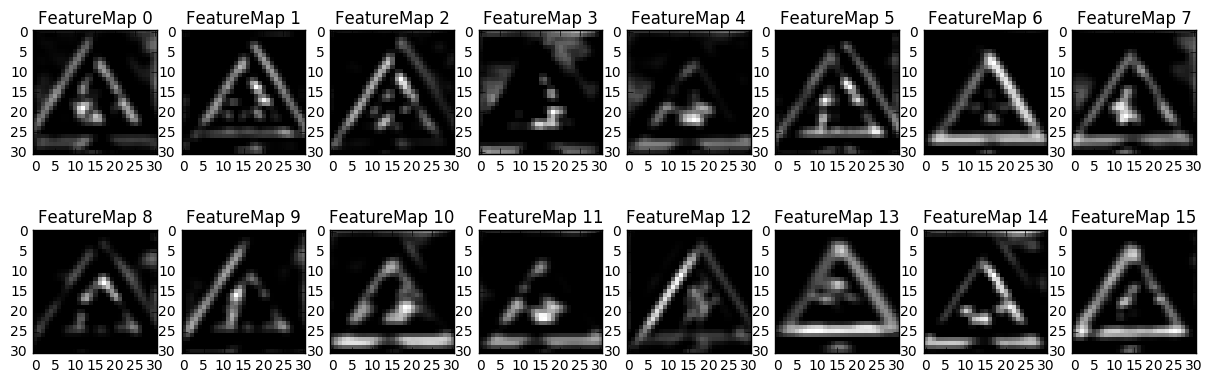

In [52]:
evaluate_feature(images, 4, 1)

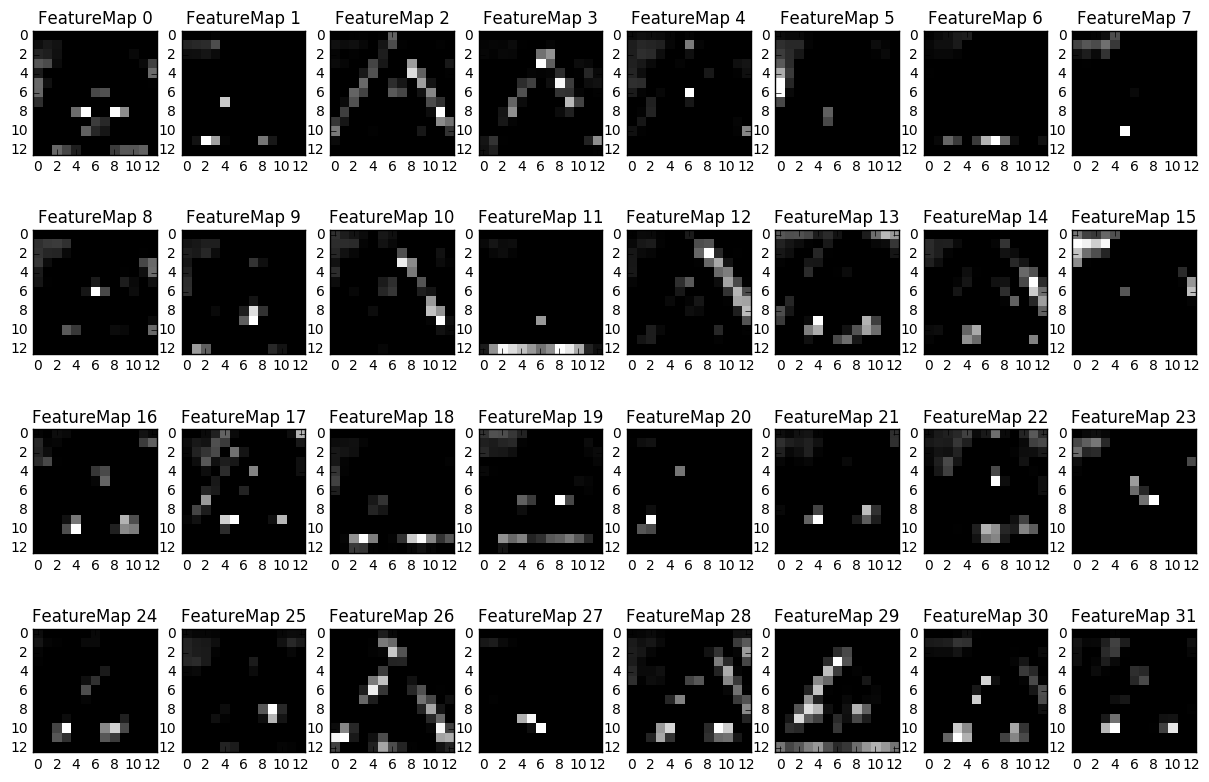

In [53]:
evaluate_feature(images, 4, 2)